# Laboratorio 06: Incertidumbre

## Reconocimiento de género en imágenes de caras

## Problema 

Se desea reconocer si una cara pertenece a un hombre o una mujer dada una imagen de una cara. La implementación del clasificador se debe realizar utilizando el material de probabilidades visto en clases.

### Base de datos

https://www.kaggle.com/cashutosh/gender-classification-dataset


## Objetivo General
* Clasificar imágenes de rostros como hombre o mujeres.

## Objetivos Específicos
1. Acondicionar las imágenes para su uso.
2. Transformar las imágenes a un conjunto de características discriminantes utilizando PCA y LDA.
3. Implementar las funciones de densidad de probabilidades para cada género.
4. Utilizar el teorema de bayes para clasificar las caras.

## Cargar imágenes y sus etiquetas

In [1]:
from os import listdir
from os.path import isfile, join
import re
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# Cargar base de datos hombres y mujeres
def load_database_gender(mypath, label=0, grayscale=False, scale=None, flatten=False):
    files = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]
    X = []
    y = []
    for file in files:
        y.append(label)
        with Image.open(file) as img:
            if grayscale:
                img = ImageOps.grayscale(img)
            if scale is not None:
                img = img.resize(scale) 
                # Transformo las imágenes a vectores numpy
            if flatten:
                img = np.array(img).flatten()
            else: # Transformo solo a matrix numpy
                img = np.array(img)
            X.append(img)
    
    return X, y
        
# path donde se encuentran las imágenes de hombres
mypath = 'database/Training/male' 

#X_male_train, y_male_train = load_database_gender(mypath, label=0, grayscale=True)
#plt.imshow(X_male_train[10])

X_male_train, y_male_train = load_database_gender(mypath, label=0, grayscale=True, scale=(25,25), flatten=False)
print(X_male_train[0].shape)

(25, 25)


## Cargar el conjunto de entrenamiento y de validación

Escriba el código para cargar el conjunto de entrenamiento (mujeres y hombres) y el de validación (mujeres y hombres).

La imagen debe ser de $25\times25$. Se utilizará la etiqueta **0 para hombre** y **1 para mujeres**.

In [ ]:
# Escriba el código aquí

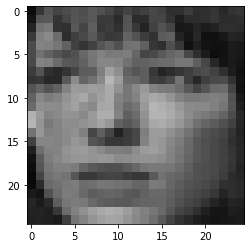

In [2]:
# Escriba el código aquí
mypath = 'database/Training/male' 
X_male_train, y_male_train = load_database_gender(mypath, label=0, grayscale=True, scale=(25,25))
plt.imshow(X_male_train[10], cmap='gray', vmin=0, vmax=255)

mypath = 'database/Training/female' 
X_female_train, y_female_train = load_database_gender(mypath, label=1, grayscale=True, scale=(25,25))
plt.imshow(X_female_train[0], cmap='gray', vmin=0, vmax=255)

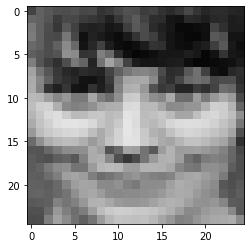

In [7]:
# Imágenes de hombres
plt.imshow(X_male_train[1], cmap='gray', vmin=0, vmax=255)

In [ ]:
# Imágenes de mujeres
plt.imshow(X_female_train[1], cmap='gray', vmin=0, vmax=255)

## Transformar las imágenes a un nuevo conjunto de características discriminantes

### PCA (_Principal Component Analysis_)

En estadística, el análisis de componentes principales (en español ACP, en inglés, PCA) es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos. 

https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales

### Transformar los datos a formato sklearn

Convertir la lista de vectores `numpy` a una matriz `numpy`

In [8]:
mypath = 'database/Training/male' 
X_male_train, y_male_train = load_database_gender(mypath, label=0, grayscale=True, scale=(25,25), flatten=True)
print(f'Largo de la lista: {len(X_male_train)}')
X_male_train = np.vstack(X_male_train)
print(f'Forma de matriz: {X_male_train.shape}')

mypath = 'database/Training/female' 
X_female_train, y_female_train = load_database_gender(mypath, label=1, grayscale=True, scale=(25,25), flatten=True)

Largo de la lista: 23766
Forma de matriz: (23766, 625)


### Aplicar PCA con sklearn

In [9]:
from sklearn.decomposition import PCA

# Concateno las matrices de hombres y mujeres
X = np.vstack((X_male_train, X_female_train))
print(X.shape)
pca = PCA(n_components=2)
pca.fit(X)

(47009, 625)


PCA(n_components=2)

### Visualizar PCA

In [10]:
pca_male_train = pca.transform(X_male_train)
pca_female_train = pca.transform(X_female_train)

print(pca_female_train.shape)

(23243, 2)


# Graficar ambos PCA

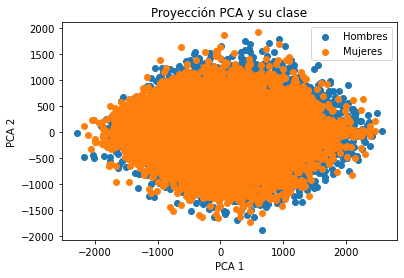

In [11]:
plt.scatter(pca_male_train[:, 0], pca_male_train[:, 1], label='Hombres')
plt.scatter(pca_female_train[:, 0], pca_female_train[:, 1], label='Mujeres')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Proyección PCA y su clase')
plt.legend()

### Proyección LDA (_Linear Discriminant Analysis_)

In [14]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.vstack((X_male_train, X_female_train))
y = y_male_train + y_female_train
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)


LinearDiscriminantAnalysis()

### Visualizar LDA

(23766, 1)


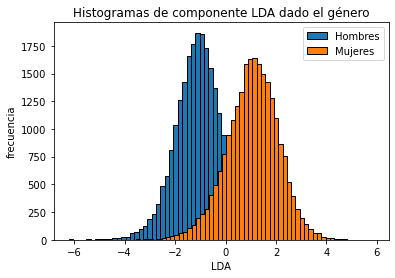

In [15]:
lda_male = clf.transform(X_male_train)
print(lda_male.shape)
lda_female = clf.transform(X_female_train)


plt.hist(lda_male, bins=60, alpha=1, edgecolor = 'black',  linewidth=1, label='Hombres')
plt.hist(lda_female, bins=60, alpha=1, edgecolor = 'black',  linewidth=1, label='Mujeres')


plt.xlabel('LDA')
plt.ylabel('frecuencia')
plt.title('Histogramas de componente LDA dado el género')
plt.grid(False)
plt.legend()

## Laboratorio:

* Construir las funciones de densidad de probabilidad para $P(X|Male)$ y $P(X|Female)$.
* Clasificar una imagen utilizando el Teorema de Bayes $P(Male|X)$
* Pruebe los siguientes modelos:
  * Aplique a las imágenes LDA y construya y pruebe el clasificador.
  * Aplique a las imágenes PCA y retenga 50 características, luego aplique LDA. Construya y pruebe el clasificador.
  * Aplique a las imágenes PCA y retenga 100 características, luego aplique LDA. Construya y pruebe el clasificador.
  * Aplique a las imágenes PCA y retenga 150 características, luego aplique LDA. Construya y pruebe el clasificador.
  
¿Qué clasificador tiene mejor rendimiento?

**Entrega: 15 de Enero hasta las 23:00 horas.**

## Matemáticas

Aplicaremos el teorema de bayes para construir el clasificador:

La regla se Bayes:

\begin{equation}
p(X_1 \mid X_2) = \frac{p(X_2 \mid X_1)p(X_1)}{\sum_{x_1} p(X_2 \mid x_1)p(x_1)}
\end{equation}

Se puede obtener, combinando las definiciones de **probabilidad condicional** y **marginalización**

\begin{equation}
p(X_1 \mid X_2) = \frac{p(X_1,X_2)}{p(X_2)} = \frac{p(X_2 \mid X_1)p(X_1)}{\sum_{x_1} p(X_2 \mid x_1)p(x_1)}.
\end{equation}

## Matemáticas

En nuestro caso, las variables aleatorias LDA y G (Género). La variable aleatoria LDA puede tomar los valores  ($\alpha_{LDA}$) y que representan los atributos de entrada. La variable G tiene valores discretos como etiquetas de salida hombre (0) y mujer (1).

Desde la base de datos podemos obtener las funciones de densidad $f(LDA|G=hombre)$ y $f(LDA|G=Mujer)$. Tanto, $f(LDA|G=hombre)$ como $f(LDA|G=Mujer)$ pueden ser aproximadas a una función gaussiana o normal ($\mathcal{N}(\mu_{LDA|G}, \sigma_{LDA|G})$).

Para nuestro caso la función de densidad normal se define:


\begin{equation}
f_{\mu,\sigma^2}(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}, \; x \in \mathbb{R}
\end{equation}






## Matemáticas

Adaptamos el teorema de bayes a nuestro problema

\begin{equation}
F(G \mid LDA) = \frac{F(LDA \mid G)p(G)}{\sum_{x \in (hombre, mujer)} p(LDA \mid x)p(x)}
\end{equation}




## Referencias
* Revisiting Linear Discriminant Techniques in Gender Recognition.  Juan Bekios-Calfa, José M. Buenaposada, Luis Baumela. IEEE Transactions on Pattern Analysis and Machine Intelligence, PAMI. [PDF](http://www.dia.fi.upm.es/%7Epcr/publications/pami2011.pdf), [info](https://ieeexplore.ieee.org/document/5661777?arnumber=5661777)